Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis

#Importing Skin Canser Dataset

In [34]:
#Importing the libraries
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling,Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,RandomFlip,RandomRotation,RandomZoom

This assignment uses a dataset of about 2357 images of skin cancer types. The datset conains 9 sub-directories in eachtrain adn test sub-directories. The 9 subdirectories contains the images of 9 skin cancer types respectively.

In [3]:
#Defining path for train and test images
data_dir_train = pathlib.Path('/content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
#Counting total image of train and test dataset.
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


##Load using keras.preprocessing utility

In [ ]:
#Defining some parameters for the loader.
batch_size=32
img_height=180
img_width=180
seed=123

In [5]:
#Loading the training dataset.
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
#Loading the Validation dataset.
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),seed=123,validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
#Listing out class naems of the types of cancer.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#Visualising Data

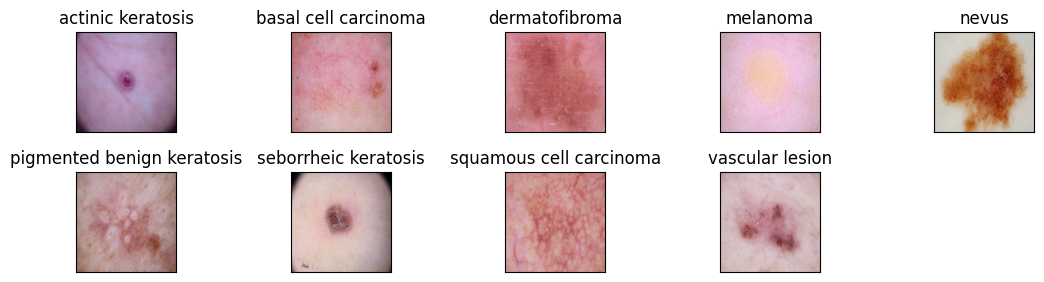

In [ ]:
#Visualising one instance of each class.
fig = plt.figure(figsize=(12,3))
for img,class_name in train_ds.take(1):
  for i in range(len(class_names)):
    ax = fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    ax.set_title(class_names[i])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.1,
                    hspace=0.4)
    plt.imshow(img[i].numpy().astype("uint8"))
plt.show()

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#checking batch shape and label batch shape.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


#Creating the Model

In [21]:
#declaring scale and counting number of classes in the dataset.
scale=1./255
num_classes = len(class_names)
num_classes

9

In [ ]:
#initializing the model.
model=Sequential()
model.add(Rescaling(scale,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()#summary of the model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [ ]:
#training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size,
  shuffle=True
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 233s 4s/step - loss: 2.1341 - accuracy: 0.2132 - val_loss: 1.8991 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 147s 3s/step - loss: 1.7298 - accuracy: 0.3845 - val_loss: 1.5567 - val_accuracy: 0.4832
Epoch 3/20
56/56 [==============================] - 152s 3s/step - loss: 1.5058 - accuracy: 0.4894 - val_loss: 1.3923 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 146s 3s/step - loss: 1.4190 - accuracy: 0.5117 - val_loss: 1.3632 - val_accuracy: 0.5391
Epoch 5/20
56/56 [==============================] - 150s 3s/step - loss: 1.3517 - accuracy: 0.5206 - val_loss: 1.4489 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 153s 3s/step - loss: 1.2711 - accuracy: 0.5379 - val_loss: 1.3259 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 148s 3s/step - loss: 1.1869 - accuracy: 0.5787 - val_loss: 1.3955 - val_accuracy: 0.5145
Epoch 8/20
56/56 [======

#Visualizing the results

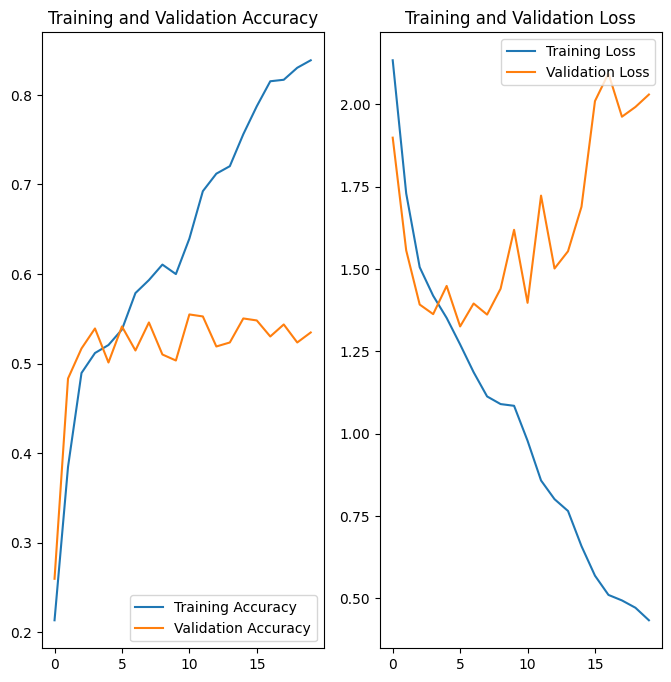

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training and Validation Accuracy differ by a huge margin.The training accuracy is increasing linearly to 90 where the validation accuracy stabalizes near at 55. The validation loss also increases where the training loss is decreasing linearly.

As per the visualization, the model is clearly overfitting.

#Class Distribution

In [32]:
dist={}
for x in class_names:
  dist[x]=(len(list(glob(os.path.join(data_dir_train, x, '*.jpg'))))*100)//2239
dist

{'actinic keratosis': 5,
 'basal cell carcinoma': 16,
 'dermatofibroma': 4,
 'melanoma': 19,
 'nevus': 15,
 'pigmented benign keratosis': 20,
 'seborrheic keratosis': 3,
 'squamous cell carcinoma': 8,
 'vascular lesion': 6}

In the above experiment we can see that there are some class imbalance present in the dataset. Some of the classes have very few images hence the model is not able to train.


As a solution we can apply data augmentation strategy to train our model.

#Data Augmentation

In [ ]:
#Applying a data augmentation strategy
Data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
   layers.RandomRotation(0.1),
  layers.RandomZoom(0.1)
  ])

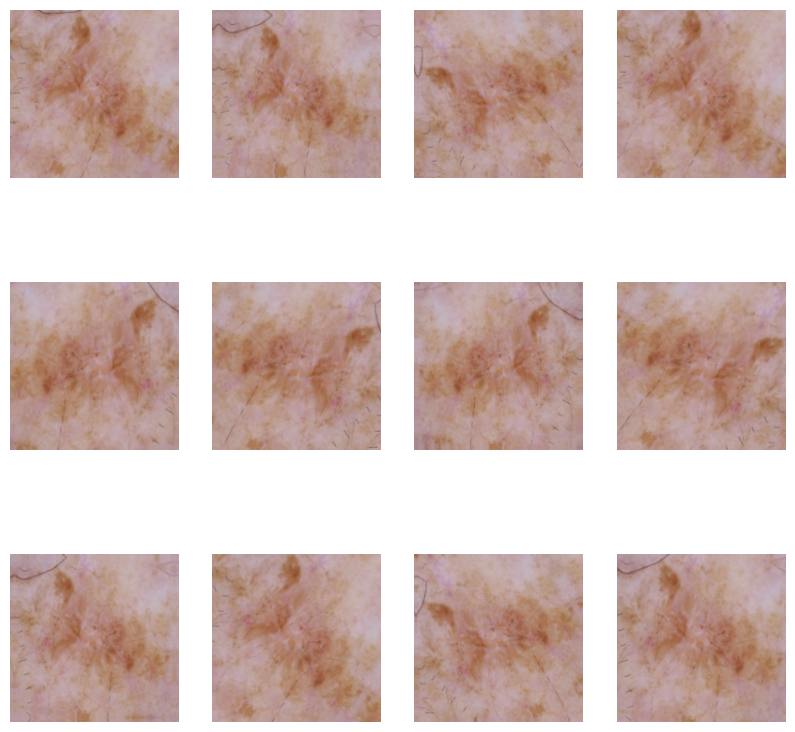

In [ ]:
#Visualisation augmentation strategy on 1 random image from the dataset.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(12):
    augmented_images = Data_augmentation(images)
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#creating model with data augmentation strategy
model_augment=Sequential()
model_augment.add(Data_augmentation)
model_augment.add(Rescaling(scale))

model_augment.add(Conv2D(32,kernel_size=3,activation='relu'))
model_augment.add(MaxPooling2D())

model_augment.add(Conv2D(64,kernel_size=3,activation='relu'))
model_augment.add(MaxPooling2D())
model_augment.add(Dropout(0.15))
model_augment.add(Conv2D(128,kernel_size=3,activation='relu'))
model_augment.add(MaxPooling2D())

model_augment.add(Flatten())
model_augment.add(Dense(256,activation='relu'))
model_augment.add(Dropout(0.2))
model_augment.add(Dense(num_classes,activation='softmax'))

In [ ]:
#compiling the model
model_augment.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_augment.summary()#summary of the model with augmentation layers.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [ ]:
#Training the augmented model.
epochs = 20
history = model_augment.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size,
  shuffle=True
)

Epoch 1/20
56/56 [==============================] - 168s 3s/step - loss: 2.0694 - accuracy: 0.2366 - val_loss: 1.8638 - val_accuracy: 0.3311
Epoch 2/20
56/56 [==============================] - 161s 3s/step - loss: 1.7703 - accuracy: 0.3666 - val_loss: 1.6480 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 165s 3s/step - loss: 1.6370 - accuracy: 0.4174 - val_loss: 1.5928 - val_accuracy: 0.4430
Epoch 4/20
56/56 [==============================] - 164s 3s/step - loss: 1.5484 - accuracy: 0.4475 - val_loss: 1.5118 - val_accuracy: 0.4676
Epoch 5/20
56/56 [==============================] - 162s 3s/step - loss: 1.4915 - accuracy: 0.4749 - val_loss: 1.4096 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 161s 3s/step - loss: 1.5522 - accuracy: 0.4487 - val_loss: 1.5290 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 162s 3s/step - loss: 1.4238 - accuracy: 0.4894 - val_loss: 1.3972 - val_accuracy: 0.5257
Epoch 8/20
56

#Visualizing the result

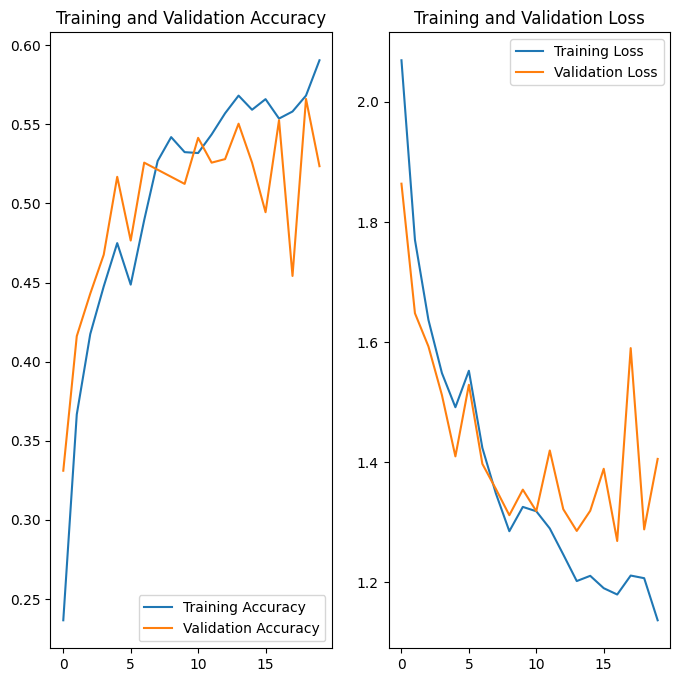

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The accuracy of the model is still low yet overfitting problem is taken care. The training accuracy is 56% and the validation accuracy is 52%

#Question
Which class has the least number of samples?

-seborrheic keratosis

Which classes dominate the data in terms proportionate number of samples?

-pigmented benign keratosis

#Rectify the class imbalance

We are using a python package known as Augmentor to add more samples across all classes so that none of the classes have very few samples.

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.

Define a number of operations to perform on this data set using your Pipeline object.

Execute these operations by calling the Pipeline’s sample() method.

In [8]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#Generating augmented samples.
path_to_training_dataset="/content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('/'.join([path_to_training_dataset, i])) 
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse. 

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDCF260BB20>: 100%|██████████| 500/500 [00:21<00:00, 23.79 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDCF265AD70>: 100%|██████████| 500/500 [00:21<00:00, 23.45 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDD1131D150>: 100%|██████████| 500/500 [00:20<00:00, 24.45 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDCF27CFF40>: 100%|██████████| 500/500 [01:46<00:00,  4.71 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDCF2677850>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDCF26FEAA0>: 100%|██████████| 500/500 [00:22<00:00, 22.43 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FDCF268B220>: 100%|██████████| 500/500 [00:51<00:00,  9.75 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCF27CECE0>: 100%|██████████| 500/500 [00:24<00:00, 20.50 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/colab/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDCF279CD00>: 100%|██████████| 500/500 [00:23<00:00, 21.54 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images

In [11]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))#counting the number of images generated.
print(image_count_train)

4473


In [12]:

path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [13]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [15]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


NameError: ignored

In [16]:
df2['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#Data Distribution after adding augmented images.

In [33]:
full_dat={}
for x in class_names:
  full_dat[x]=len(list(glob(os.path.join(data_dir_train, x, '*.jpg'))))+len(list(glob(os.path.join(data_dir_train, x,'output', '*.jpg'))))
full_dat

{'actinic keratosis': 607,
 'basal cell carcinoma': 870,
 'dermatofibroma': 595,
 'melanoma': 924,
 'nevus': 857,
 'pigmented benign keratosis': 962,
 'seborrheic keratosis': 577,
 'squamous cell carcinoma': 681,
 'vascular lesion': 639}

#Training the model on new data

In [17]:
#declaring some parameters for image_dataset_from_directory function.
batch_size = 32
img_height = 180
img_width = 180

In [18]:
#Loading the training data from the train dataset. Subsetting it as training dataset.
data_dir_train=path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6712 files belonging to 9 classes.
Using 5370 files for training.


In [19]:
#Loading the validation data from the train dataset. Subsetting it as validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6712 files belonging to 9 classes.
Using 1342 files for validation.


In [22]:
#Initializing the model.
model_aug=Sequential()
model_aug.add(Rescaling(scale,input_shape=(img_height,img_width,3)))

model_aug.add(Conv2D(32,kernel_size=3,activation='relu'))
model_aug.add(MaxPooling2D())

model_aug.add(Conv2D(64,kernel_size=3,activation='relu'))
model_aug.add(MaxPooling2D())
model_aug.add(Dropout(0.15))
model_aug.add(Conv2D(128,kernel_size=3,activation='relu'))
model_aug.add(MaxPooling2D())
model_aug.add(Dropout(0.15))
model_aug.add(Flatten())
model_aug.add(Dense(256,activation='relu'))
model_aug.add(Dropout(0.2))
model_aug.add(Dense(num_classes,activation='softmax'))

In [23]:
#compiling the model
model_aug.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model_aug.summary()#summary of the model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 43, 43, 64)       

In [25]:
#Training the augmented model.
epochs = 30
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size,
  shuffle=True
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


168/168 [==============================] - 51s 215ms/step - loss: 1.9365 - accuracy: 0.2652 - val_loss: 1.5939 - val_accuracy: 0.4151
Epoch 2/30
168/168 [==============================] - 35s 199ms/step - loss: 1.5476 - accuracy: 0.4134 - val_loss: 1.3840 - val_accuracy: 0.4687
Epoch 3/30
168/168 [==============================] - 36s 205ms/step - loss: 1.3232 - accuracy: 0.5080 - val_loss: 1.2526 - val_accuracy: 0.5097
Epoch 4/30
168/168 [==============================] - 34s 196ms/step - loss: 1.1778 - accuracy: 0.5533 - val_loss: 1.1020 - val_accuracy: 0.5745
Epoch 5/30
168/168 [==============================] - 35s 198ms/step - loss: 0.9909 - accuracy: 0.6387 - val_loss: 1.0193 - val_accuracy: 0.6297
Epoch 6/30
168/168 [==============================] - 34s 193ms/step - loss: 0.8804 - accuracy: 0.6743 - val_loss: 0.8879 - val_accuracy: 0.6937
Epoch 7/30
168/168 [==============================] - 35s 198ms/step - loss: 0.7268 - accuracy: 0.7298 - val_loss: 0.9250 - val_accuracy: 0.6

##Visualizing the history of the model created using the augmented images generated by the augmentor library.

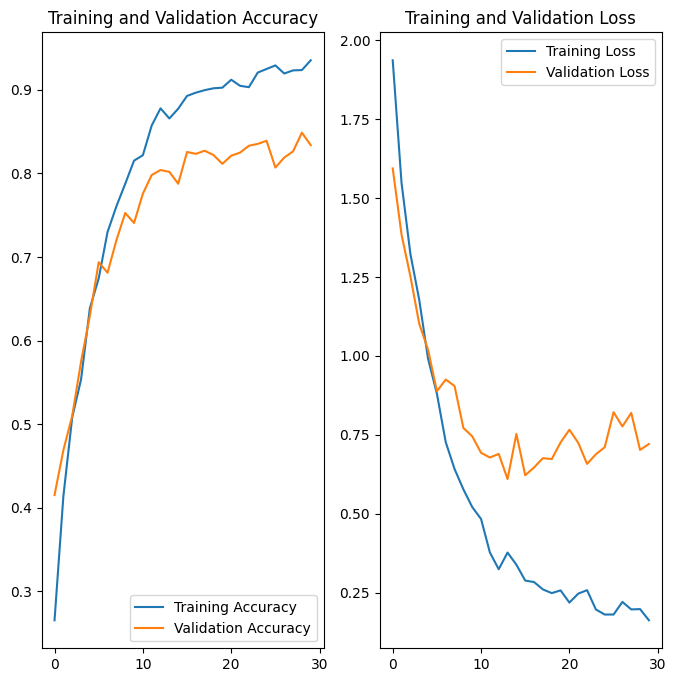

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training accuracy is stabalized for 91% average and valudation accuracy at 83%.

The validation loss decreases liearly with training loss at the beginning yet it is still not stable.

The model seems to overfit a little bit although the difference in training and validation accuracy is not high. 

In my own terms the variance of 5% is acceptable and more than that is overfitting yet this might be acceptable due to good validation accuracy.

#Notebook notes

1- The number of augmented images are 4473 rather than 4500.

2- The class distribution code is different from the starter notebook as it was not actually working for me.